In [5]:
import os
import sys
from datasets import load_dataset


In [2]:
os.chdir('..')

In [3]:
from src.model_wrapper import create_predict_func
from huggingface_hub import snapshot_download

In [4]:
model_path = snapshot_download(
    repo_id="dbest-isi/searchless-chess-9M-selfplay",
    local_dir="./searchless_chess_model"
)
print(f"Model downloaded to: {model_path}")
model_path = '/teamspace/studios/this_studio/distill-chess/searchless_chess_model'

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Model downloaded to: /teamspace/studios/this_studio/distill-chess/searchless_chess_model


In [6]:
# Add bundled code to Python path
sys.path.insert(0, f"{model_path}/searchless_chess_code")

In [7]:

import hf_model
import utils
import tokenizer

# Load the model
model = hf_model.SearchlessChessModel.from_pretrained(model_path)
model.predict = create_predict_func(model, utils, tokenizer)

# Make a prediction
fen = "rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e3 0 1"
result = model.predict(fen, temperature=1.0)

print(f"Best move: {result['best_move']}")
print(f"Q-value: {result['q_value']:.4f}")
print(f"Action probabilities shape: {result['action_probs'].shape}")

2025-11-26 00:16:52.653415: W external/xla/xla/service/gpu/autotuning/dot_search_space.cc:200] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs?Working around this by using the full hints set instead.


Best move: b7b5
Q-value: 0.7648
Action probabilities shape: (1968,)


In [16]:
(result['action_probs'] > 0.01).sum()

20

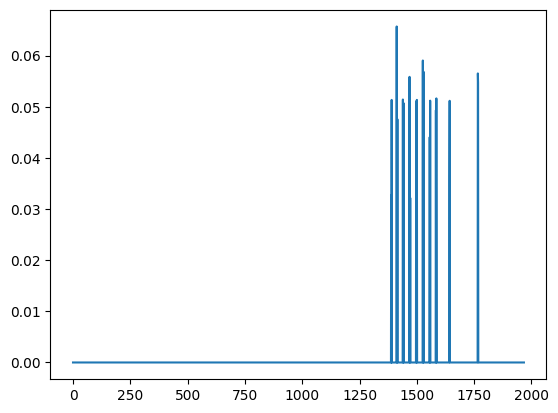

In [14]:
import pandas as pd
# pd.Series(result['action_probs']).hist(bins=100)
import matplotlib.pyplot as plt
plt.plot(result['action_probs'])

In [8]:
ds = load_dataset(
    "Lichess/chess-position-evaluations", 
    split="train[0:60_000_000]", # Download the first 60M samples
)